In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import investpy
import cryptocompare
from datetime import datetime

# For plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
sns.set_theme(style='darkgrid', palette='deep')


df =  pd.read_csv('Data.csv')

In [2]:
df.head()

,coin,amount,price_EUR,fees_EUR,date_purchased
0,BTC,0.005842,72.16,2.84,21/08/2020
1,BTC,0.008702,190.75,0.00,07/06/2020
2,BTC,0.009843,88.16,2.84,14/04/2020
3,BTC,0.016705,221.75,0.00,03/03/2020
4,DNT,243.160569,56.01,4.99,21/02/2020


In [3]:
initialPriceEUR = sum(df['price_EUR'])
totalFees = sum(df['fees_EUR'])

In [4]:
df['coin']
groupedByType = df.groupby('coin')['price_EUR'].sum()
groupedByType

coin
BTC     572.82
DNT      81.02
ETH     360.38
LINK     91.38
Name: price_EUR, dtype: float64

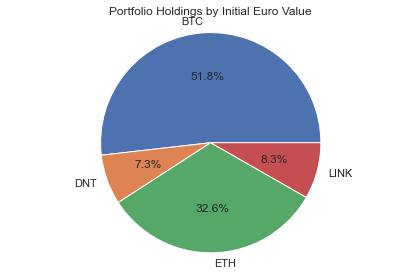

In [5]:
plt.pie(groupedByType,labels=('BTC','DNT','ETH','LINK'),autopct='%1.1f%%')
plt.title('Portfolio Holdings by Initial Euro Value')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Cryptocurrency Price Retrieval

In [6]:
dfBTC = cryptocompare.get_price('BTC')['BTC']['EUR']
dfETH = cryptocompare.get_price('ETH')['ETH']['EUR']
dfLINK = cryptocompare.get_price('LINK')['LINK']['EUR']
dfDNT = cryptocompare.get_price('DNT')['DNT']['EUR']

# Portfolio Status

In [7]:
groupedByAmount = df.groupby('coin')['amount'].sum()
print(groupedByAmount)
btc = groupedByAmount[0]*(dfBTC)
dnt = groupedByAmount[1]*(dfDNT)
eth = groupedByAmount[2]*(dfETH)
link = groupedByAmount[3]*(dfLINK)

currentValue = btc + dnt + eth + link
currentValueFeesDeducted = currentValue - totalFees
currentValueFeesDeducted

coin
BTC       0.041092
DNT     743.321139
ETH       0.321416
LINK      9.142413
Name: amount, dtype: float64


2943.7025545096317

In [8]:
percentageDifference = ((currentValue - initialPriceEUR - totalFees) / initialPriceEUR) * 100.0

print("Percentage Difference from Initial Purchase, Fees Deducted")
round(percentageDifference)

Percentage Difference from Initial Purchase, Fees Deducted


166

# Capital Gains Tax

Capital gains tax varies from country to country. For example in Spain, under Income Savings Tax the range of capital gains tax is from 19 to 26%. 

* Gains of 0€ to 6.000€ are taxed at 19%
* Gains of 6.001€ to 50.000€ are taxed at 21%
* Gains of 50.001€ to 200,000€ are taxed at 23%
* Gains of 200,001€ plus: 26% (as of 2021)

In [9]:
capitalGain = currentValue - initialPriceEUR - totalFees

In [10]:
percent = [0.19, 0.21, 0.23, 0.26]
additive = [1140, 9240, 34500]

if capitalGain <= 6000:
    tax = capitalGain * percent[0]
elif capitalGain <= 50000: 
    tax = additive[0] + ((capitalGain-6000) * percent[1])
elif capitalGain <= 200000:
    tax = np.sum(additive[:2]) + ((capitalGain-50000) * percent[2])
elif capitalGain >= 200000:
    tax = sum(additive) + ((capitalGain-200000) * percent[3])

print("Capital Gains Tax")
print(round(tax))


Capital Gains Tax
349


In [11]:
print("Profit with Capital Gains Tax Deducted")
print(round(capitalGain - tax))

Profit with Capital Gains Tax Deducted
1489


# Cryptocurrency Information Retrieval


In [12]:
todaysDate = datetime.today().strftime('%d/%m/%Y')

In [13]:
dfBTC_info = investpy.crypto.get_crypto_information(crypto='bitcoin', as_json=False)
dfBTC_hist_info = investpy.get_crypto_historical_data(crypto='bitcoin', from_date='01/01/2020', to_date=todaysDate)

dfETH_info = investpy.crypto.get_crypto_information(crypto='ethereum', as_json=False)
dfETH_hist_info = investpy.get_crypto_historical_data(crypto='ethereum', from_date='01/01/2020', to_date=todaysDate)

dfDNT_info = investpy.crypto.get_crypto_information(crypto='district0x', as_json=False)
dfDNT_hist_info = investpy.get_crypto_historical_data(crypto='district0x', from_date='01/01/2020', to_date=todaysDate)

dfLINK_info = investpy.crypto.get_crypto_information(crypto='chainlink', as_json=False)
dfLINK_hist_info = investpy.get_crypto_historical_data(crypto='chainlink', from_date='01/01/2020', to_date=todaysDate)

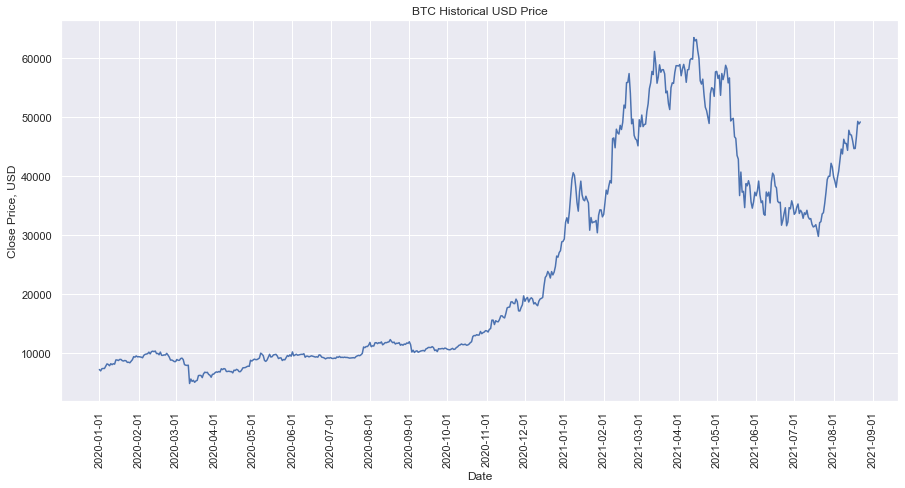

In [14]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(x=dfBTC_hist_info.index, y=dfBTC_hist_info['Close']).set_title('BTC Historical USD Price')

# specify the position of the major ticks at the first day of the month, with a month interval of 1
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Close Price, USD')

# show the plot
plt.show()

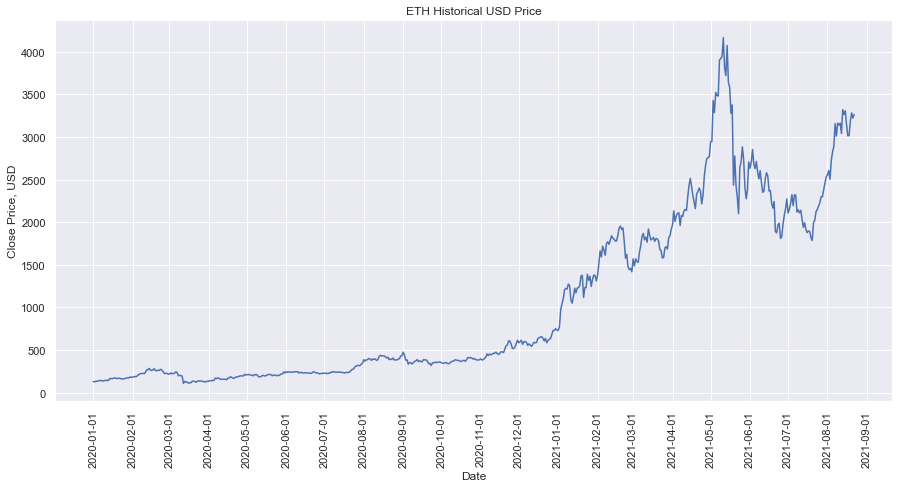

In [15]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(x=dfETH_hist_info.index, y=dfETH_hist_info['Close']).set_title('ETH Historical USD Price')

# specify the position of the major ticks at the first day of the month, with a month interval of 1
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Close Price, USD')

# show the plot
plt.show()

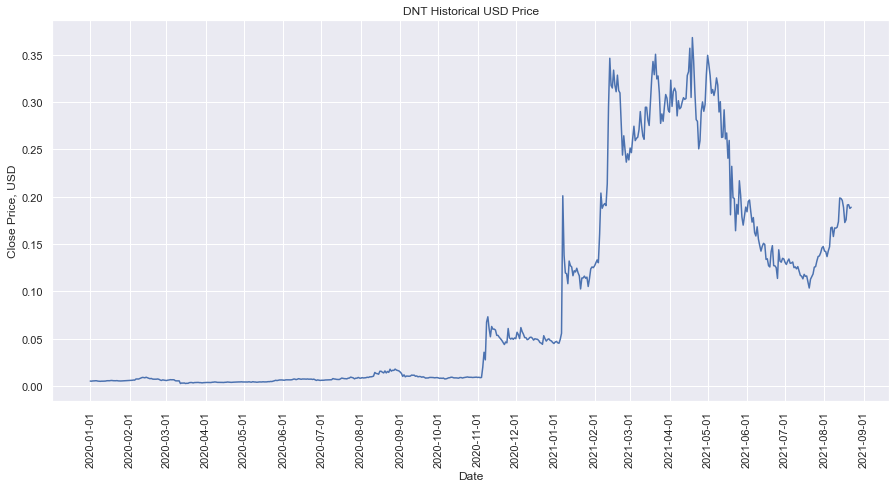

In [16]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(x=dfDNT_hist_info.index, y=dfDNT_hist_info['Close']).set_title('DNT Historical USD Price')

# specify the position of the major ticks at the first day of the month, with a month interval of 1
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Close Price, USD')

# show the plot
plt.show()

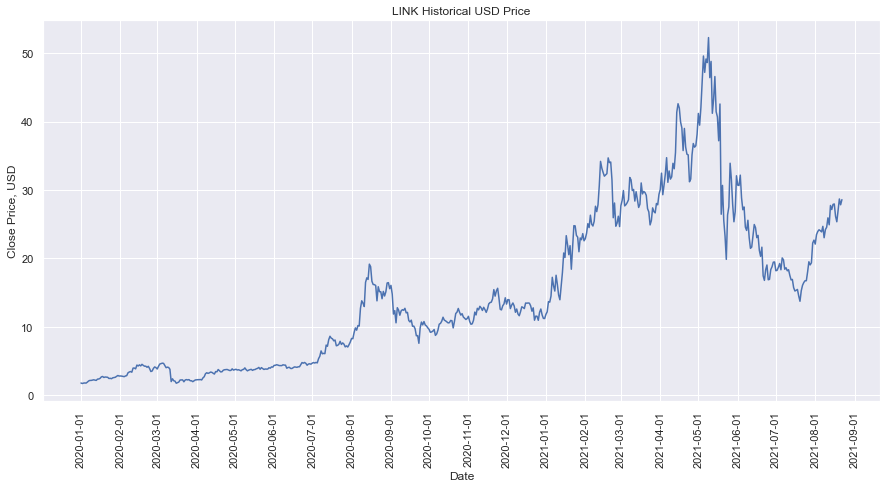

In [17]:
# prepare the figure
fig, ax = plt.subplots(figsize = (15, 7))

sns.lineplot(x=dfLINK_hist_info.index, y=dfLINK_hist_info['Close']).set_title('LINK Historical USD Price')

# specify the position of the major ticks at the first day of the month, with a month interval of 1
ax.xaxis.set_major_locator(md.MonthLocator(bymonthday=1, interval=1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
# rotate by 90° the labels in order to improve their spacing
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 90)

# set axes labels
plt.xlabel('Date')
plt.ylabel('Close Price, USD')

# show the plot
plt.show()